In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import math

In [2]:
data_directory = '/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/2020/D1_mGluRKO_clustering/data/run_01/wt'
data_directory_ko = '/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/2020/D1_mGluRKO_clustering/data/run_01/ko'

In [17]:
#'GRIN034_H16_M13_S22'
WT_sessions = ['GRIN013_H13_M33_S54', 'GRIN026_H16_M35_S34', 'GRIN027_H13_M29_S44', 'GRIN032_H16_M49_S22', 'GRIN032_H17_M30_S22', 'GRIN033_H13_M42_S33',
               'GRIN033_H14_M34_S32', 'GRIN034_H15_M28_S2', 'GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18', 'GRIN035_H13_M31_S20', 'GRIN035_H13_M50_S58', 'GRIN035_H14_M40_S34'] ; 
#'GRIN018_H16_M13_S53'
KO_sessions = ['GRIN009_H13_M59_S14', 'GRIN011_H10_M19_S59', 'GRIN012_H16_M57_S23', 'GRIN012_H17_M32_S17', 'GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53'] ;

## compile and plot genotype data

In [18]:
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session = {}
for session in WT_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory+'/'+session+'*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1][:-4]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session[session] = session_output
    
#compile in dictionaries
#might need to shift matlab pair inidcies due to 1-indexing
jaccard_analysis_by_session_ko = {}
for session in KO_sessions:
    print(session)
    session_output = {}
    for file in glob.glob(data_directory_ko+'/'+session+'*normlBinnedCellJaccards.csv'):
        session_output[file.split('_')[-1][:-4]] = pd.read_csv(file, header=None)
    jaccard_analysis_by_session_ko[session] = session_output

GRIN013_H13_M33_S54
GRIN026_H16_M35_S34
GRIN027_H13_M29_S44
GRIN032_H16_M49_S22
GRIN032_H17_M30_S22
GRIN033_H13_M42_S33
GRIN033_H14_M34_S32
GRIN034_H15_M28_S2
GRIN034_H16_M13_S22
GRIN034_H19_M0_S18
GRIN035_H13_M31_S20
GRIN035_H13_M50_S58
GRIN035_H14_M40_S34
GRIN009_H13_M59_S14
GRIN011_H10_M19_S59
GRIN012_H16_M57_S23
GRIN012_H17_M32_S17
GRIN018_H17_M41_S43
GRIN018_H16_M13_S53


In [19]:
#plot across sessions
genotype_compiled = pd.concat([jaccard_analysis_by_session[session]['normlBinnedCellJaccards'] for session in WT_sessions], keys=WT_sessions)
genotype_compiled_ko = pd.concat([jaccard_analysis_by_session_ko[session]['normlBinnedCellJaccards'] for session in KO_sessions], keys=KO_sessions)

In [20]:
#x-axis for plot
#bin_vector = np.linspace(20, 500, len(jaccard_analysis_by_session_ko['GRIN011_H10_M19_S59']['normlBinnedCellJaccards'].values[0]))

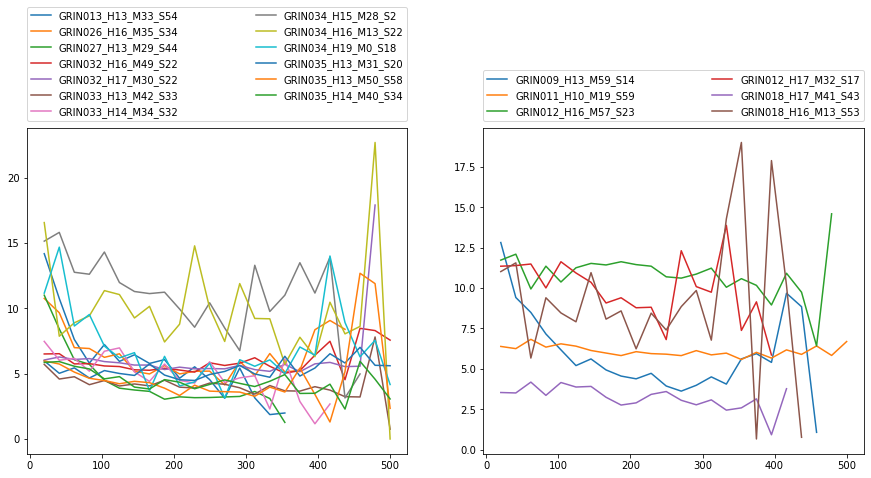

In [21]:
fig = plt.figure()
plt.subplot(1, 2, 1)

for session in range(len(genotype_compiled)):
    bin_vector = np.linspace(20, 500, len(genotype_compiled.iloc[session,:].values))
    plt.plot(bin_vector, genotype_compiled.iloc[session,:].values, label=list(genotype_compiled.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)

plt.subplot(1, 2, 2)

for session in range(len(genotype_compiled_ko)):
    bin_vector = np.linspace(20, 500, len(genotype_compiled_ko.iloc[session,:].values))
    plt.plot(bin_vector, genotype_compiled_ko.iloc[session,:].values, label=list(genotype_compiled_ko.index)[session][0])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

fig.set_size_inches(15, 6)
fig.savefig('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/openfield_analysis/spatial_clustering/summary_figs/coactivity_data_bysession_sidebyside.pdf', transparent=True)
plt.show()

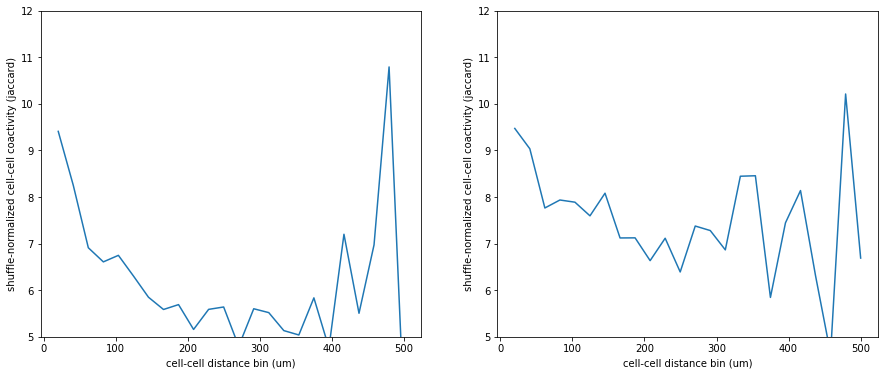

In [22]:
#plot average for genotype
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(bin_vector, genotype_compiled.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((5,12))
#plot average for genotype
plt.subplot(1, 2, 2)
plt.plot(bin_vector, genotype_compiled_ko.mean())
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((5,12))


fig.set_size_inches(15, 6)
fig.savefig('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/openfield_analysis/spatial_clustering/summary_figs/coactivity_data_sidebyside.pdf', transparent=True)
plt.show()

## compile ko data

## overlay ko and wt 

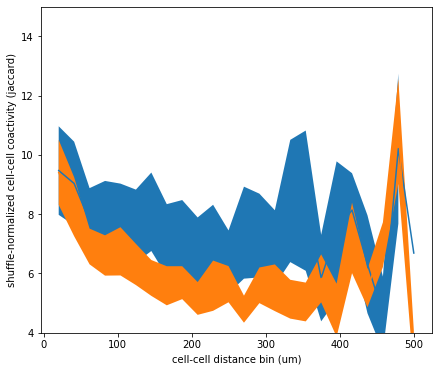

In [23]:
mean = genotype_compiled.mean()
mean_ko = genotype_compiled_ko.mean()
std_error = genotype_compiled.std()/math.sqrt(13)
std_error_ko = genotype_compiled_ko.std()/math.sqrt(6)
plt.plot(bin_vector, mean_ko)
plt.plot(bin_vector, mean)
plt.fill_between(bin_vector, mean_ko-std_error_ko, mean_ko+std_error_ko)
plt.fill_between(bin_vector, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('shuffle-normalized cell-cell coactivity (jaccard)')
ax.set_xlabel('cell-cell distance bin (um)')
ax.set_ylim((4,15))
fig = plt.gcf()
fig.set_size_inches(7, 6)
fig.savefig('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/openfield_analysis/spatial_clustering/summary_figs/combined_coactivity.pdf', transparent=True)
plt.show()